# Convolutional Neural Networks
This notebook will guide you through the use of the `keras` package to train convolutional neural networks for handwritten digits classification. You are going to use the `mnist` dataset from LeCun et al. 1998.

## Loading the packages

In [1]:
import numpy as np
from matplotlib import pyplot as pl

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow import keras as keras
from sklearn import metrics as me

%matplotlib inline

### Load the `mnist` dataset and normalize in the range [0, 1]

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

n_train, height, width = X_train.shape
n_test, _, _ = X_test.shape

X_train = np.expand_dims(X_train, axis=3).astype(np.float32)
X_test = np.expand_dims(X_test, axis=3).astype(np.float32)

X_train /= 255.0
X_test /= 255.0

n_classes = 10

print(n_train, 'train samples')
print(n_test, 'test samples')

# convert class vectors to binary class matrices
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

11493376/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples
(60000, 28, 28, 1) (60000,)
(10000, 28, 28, 1) (10000,)


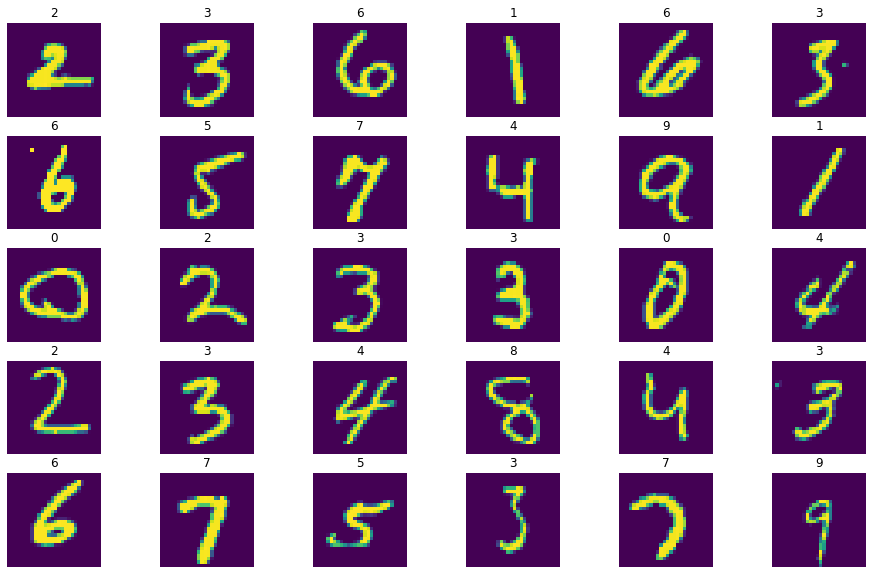

In [3]:
pl.figure(figsize=(16,10))
for i in range(30):
    pl.subplot(5,6,i+1)
    j = np.random.randint(0,X_train.shape[0])
    pl.imshow(X_train[j,:,:,0])
    pl.title(y_train[j])
    pl.axis('off')

### Make sure that the dimension ordering matches the backend (tensorflow)

In [4]:
print(keras.backend.image_data_format())

channels_last


### Create the CNN and show its architecture (Functional API)

In [67]:
l0 = keras.layers.Input(shape=(height, width, 1), name='l0')

l1 = keras.layers.Conv2D(1, (5, 5), padding='same', activation='relu', name='l1')(l0)
l1_mp = keras.layers.MaxPooling2D(pool_size=(2, 2), name='l1_mp')(l1)

l2 = keras.layers.Conv2D(2, (5, 5), padding='same', activation='relu', name='l2')(l1_mp)
l2_mp = keras.layers.MaxPooling2D(pool_size=(2, 2), name='l2_mp')(l2)

l3 = keras.layers.Conv2D(4, (3, 3), padding='same', activation='relu', name='l3')(l2_mp)
l3_mp = keras.layers.MaxPooling2D(pool_size=(2, 2), name='l3_mp')(l3)

flat = keras.layers.Flatten(name='flat')(l3_mp)

l4 = keras.layers.Dense(25, activation='relu', name='l4')(flat)

l5 = keras.layers.Dense(n_classes, activation='softmax', name='l5')(l4)

model = keras.models.Model(inputs=l0, outputs=l5)
model.summary()

Model: "model_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
l0 (InputLayer)              [(None, 28, 28, 1)]       0         
_________________________________________________________________
l1 (Conv2D)                  (None, 28, 28, 1)         26        
_________________________________________________________________
l1_mp (MaxPooling2D)         (None, 14, 14, 1)         0         
_________________________________________________________________
l2 (Conv2D)                  (None, 14, 14, 2)         52        
_________________________________________________________________
l2_mp (MaxPooling2D)         (None, 7, 7, 2)           0         
_________________________________________________________________
l3 (Conv2D)                  (None, 7, 7, 4)           76        
_________________________________________________________________
l3_mp (MaxPooling2D)         (None, 3, 3, 4)           0 

### Define some constants and train de CNN

In [73]:
batch_size = 16
n_epoch = 10

model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.SGD(), metrics=['accuracy'])

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=n_epoch, verbose=1,
                    validation_data=(X_test, Y_test))

Epoch 1/10
3750/3750 [==============================] - 20s 5ms/step - loss: 0.2883 - accuracy: 0.9131 - val_loss: 0.2305 - val_accuracy: 0.9284
Epoch 2/10
3750/3750 [==============================] - 19s 5ms/step - loss: 0.2242 - accuracy: 0.9302 - val_loss: 0.1991 - val_accuracy: 0.9409
Epoch 3/10
3750/3750 [==============================] - 19s 5ms/step - loss: 0.2037 - accuracy: 0.9383 - val_loss: 0.1547 - val_accuracy: 0.9526
Epoch 4/10
3750/3750 [==============================] - 18s 5ms/step - loss: 0.1814 - accuracy: 0.9432 - val_loss: 0.1512 - val_accuracy: 0.9505
Epoch 5/10
3750/3750 [==============================] - 19s 5ms/step - loss: 0.1708 - accuracy: 0.9470 - val_loss: 0.1487 - val_accuracy: 0.9523
Epoch 6/10
3750/3750 [==============================] - 21s 6ms/step - loss: 0.1632 - accuracy: 0.9488 - val_loss: 0.1380 - val_accuracy: 0.9564
Epoch 7/10
3750/3750 [==============================] - 22s 6ms/step - loss: 0.1559 - accuracy: 0.9517 - val_loss: 0.1486 - val_ac

### Show the performance of the model

Test score: 0.13343365490436554
Test accuracy: 0.9581000208854675


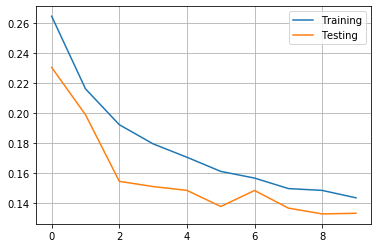

In [74]:
pl.plot(history.history['loss'], label='Training')
pl.plot(history.history['val_loss'], label='Testing')
pl.legend()
pl.grid()

score = model.evaluate(X_test, Y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])

Confusion matrix

In [75]:
pred_probas = model.predict_on_batch(X_test)
pred_classes = np.argmax(pred_probas, axis=-1)
me.confusion_matrix(y_test, pred_classes)

array([[ 968,    0,    1,    0,    1,    2,    2,    1,    5,    0],
       [   0, 1127,    2,    0,    2,    0,    0,    3,    0,    1],
       [  11,    8,  988,    6,    0,    3,    1,   12,    1,    2],
       [   2,    0,   13,  916,    0,   45,    0,    8,   11,   15],
       [   1,    0,    4,    0,  936,    0,    7,    0,    3,   31],
       [   3,    0,    0,    5,    1,  865,    6,    1,    4,    7],
       [   7,    2,    1,    0,    4,    6,  934,    0,    4,    0],
       [   1,    4,   12,    3,    0,    0,    0,  977,    2,   29],
       [  15,    1,    7,    7,    5,   18,    7,    9,  896,    9],
       [   6,    1,    2,    4,   12,    5,    0,    4,    1,  974]])

### Show the activation of individual layers

In [76]:
class_target = 5                                    # select the class to be visualized
mask = Y_train[:,class_target] > 0.5
sample = np.random.choice(np.where(mask)[0],1)[0]   # choose a random sample of the selected class
layer_outputs = []
for l in range(1, len(model.layers)):
    get_layer_output = K.function([model.layers[0].input],
                                  [model.layers[l].output])
    layer_outputs.append(get_layer_output(X_train[sample:(sample+1)])[0][0])

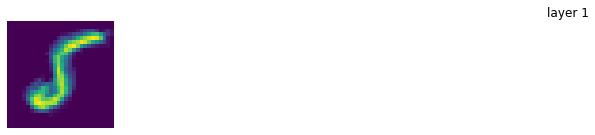

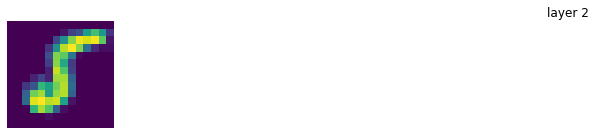

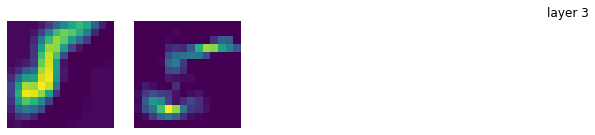

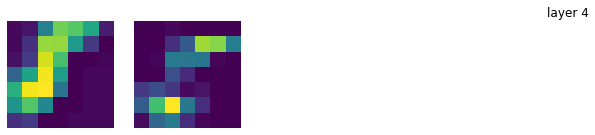

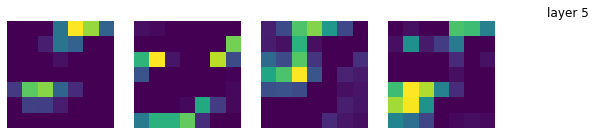

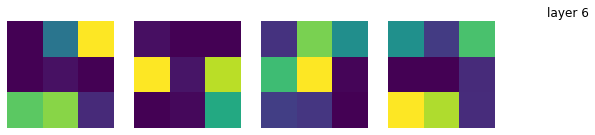

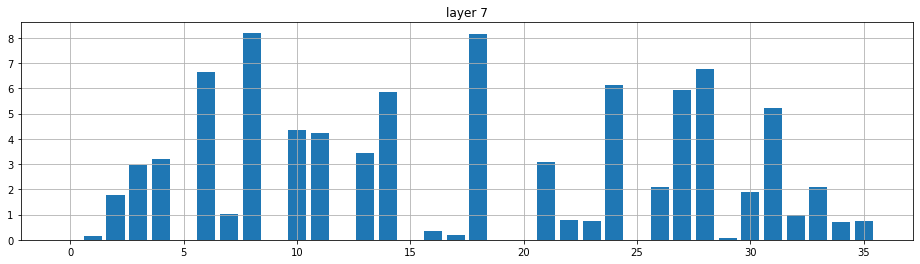

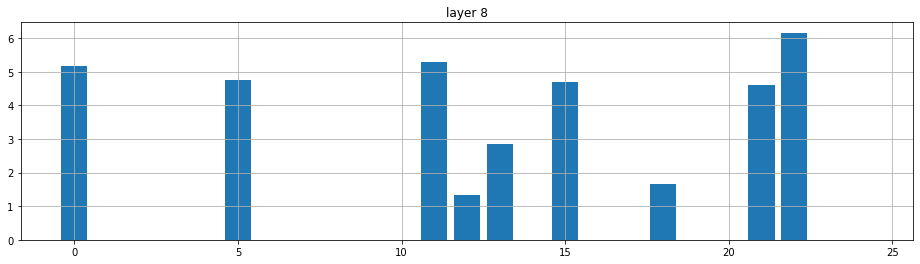

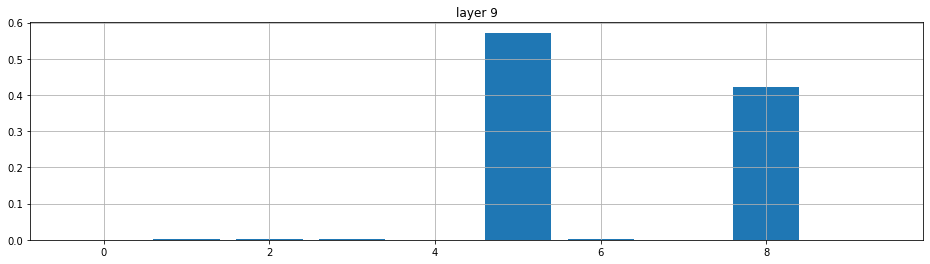

In [77]:
N_COLS = 9
for l,output in enumerate(layer_outputs):
    if len(output.shape) > 1:
        r = int(np.ceil(output.shape[2] / N_COLS))
        pl.figure(figsize=(16,r*(16/N_COLS)))
        for i in range(output.shape[2]):
            s = int(np.sqrt(output.shape[2]))
            pl.subplot(r,N_COLS,i+1)
            pl.imshow(output[:,:,i])
            pl.axis('off')
        pl.tight_layout()
        pl.suptitle(f'layer {l+1}', y=1.03)
    else:
        pl.figure(figsize=(16,4))
        pl.bar(np.arange(output.shape[0]), output)
        pl.grid()
        pl.title(f'layer {l+1}')